# Arvore de decisão 
**Teorico**

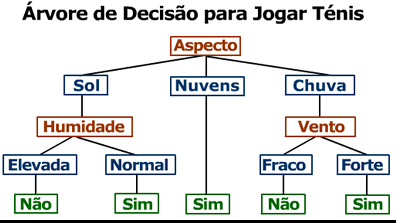

- O algoritmo usa a forma da entropia e ganho de informação para determinar os atributos mais importantes e melhores atributos para colocar no topo da nossa arvore. 
- pegamos o atributo de maior ganho de informação para ser a raiz da arvore



**Outra fomra**
Podemos tambem colocar bolas(que representam categorias) em um grafico e idade por anos de estudo, por exemplo, e fazer divisões, dividindo o grafico, e formando uma arvore de decisão a partir disso, uma vez que as divisões seriam como um IF, uma vez que estamos em um grafico

- **o que é poda**

- podemos nos livrar de atributos que nao fazer muita diferença no resultado final

- **bias**
- erros por classificação errada


- **variancia**
- erros por sensibilidade pequena a mudanças na base de treinamento, gerando overfitting


- **Vantagens x Desvantagens**
- Facil implementação
- não precisa normazilar ou padronizar os dados
- rápido para classificar novos registros
- geração de arvores muito complexas, grando overfitting
- pequenas mudanças nos dados pode mudar a arvore(poda pode ajudar)
- problemas NP-completo para construir árvores


Upgrades como random forest melhoram o desempenho da arvore de decisão

# Arvore de decisão
pratica

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

## Base de dados risco credito

In [ ]:
import pickle
with open ('/content/drive/MyDrive/Machine Learning e Data Science com Python de A a Z/01. Classificação /risco_credito.pkl', 'rb') as f:
  X_rc, y_rc = pickle.load(f)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning e Data Science com Python de A a Z/Bases de dados/risco_credito.csv')

In [ ]:
df

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo
5,desconhecida,baixa,adequada,acima_35,baixo
6,ruim,baixa,nenhuma,0_15,alto
7,ruim,baixa,adequada,acima_35,moderado
8,boa,baixa,nenhuma,acima_35,baixo
9,boa,alta,adequada,acima_35,baixo


In [ ]:
X_rc

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [ ]:
arvore_rc = DecisionTreeClassifier(criterion='entropy')

In [ ]:
arvore_rc.fit(X_rc, y_rc)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
arvore_rc.feature_importances_

array([0.41391643, 0.06408636, 0.03885431, 0.4831429 ])

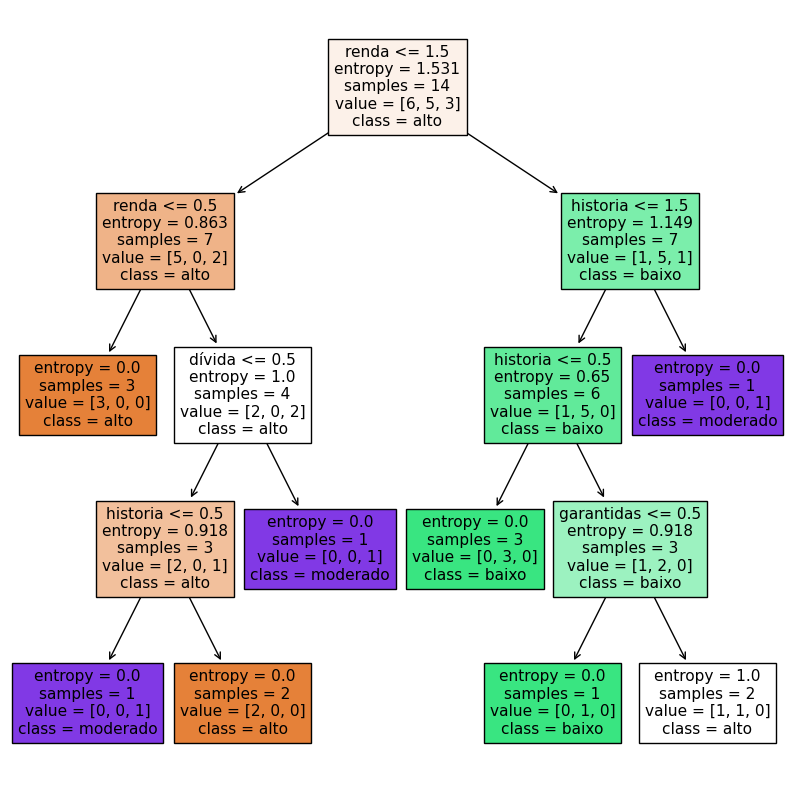

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
previsores = ['historia', 'dívida', 'garantidas', 'renda']
fig, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
tree.plot_tree(arvore_rc, feature_names=previsores, class_names = arvore_rc.classes_, filled=True);


In [ ]:
previsoes = arvore_rc.predict([[0,0,1,2], [2,0,0,0]])
previsoes

array(['baixo', 'alto'], dtype=object)

##Base credito - 0.982

In [ ]:
import pickle
with open('/content/drive/MyDrive/Machine Learning e Data Science com Python de A a Z/01. Classificação /credit.pkl', 'rb') as f:
  X_credit_train, X_credit_test, y_credit_train, y_credit_test = pickle.load(f)

In [ ]:
X_credit_train.shape, y_credit_train.shape

((1500, 3), (1500,))

In [ ]:
X_credit_test.shape, y_credit_test.shape

((500, 3), (500,))

In [ ]:
arvore_credit = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_credit.fit(X_credit_train, y_credit_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
previsoes = arvore_credit.predict(X_credit_test)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
y_credit_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
accuracy_score(y_credit_test, previsoes)

0.982

0.982

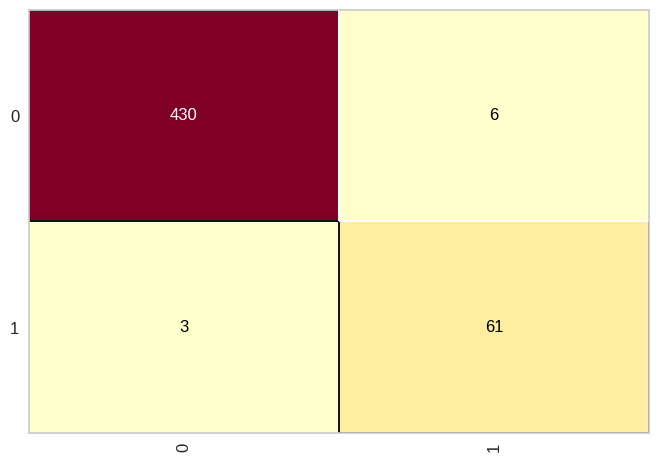

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_credit)
cm.fit(X_credit_train, y_credit_train)
cm.score(X_credit_test, y_credit_test)

Melhoramos muito em relação ai naive bayes

In [ ]:
print(classification_report(y_credit_test, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



## Census

In [ ]:
with open('/content/drive/MyDrive/Machine Learning e Data Science com Python de A a Z/01. Classificação /census.pkl', 'rb') as f:
  X_census_train, X_census_test, y_census_train, y_census_test = pickle.load(f)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning e Data Science com Python de A a Z/Bases de dados/census.csv')
df.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
X_census_train.shape

(27676, 108)

In [ ]:
arvore_census = DecisionTreeClassifier(criterion ='entropy', random_state=0)
arvore_census.fit(X_census_train, y_census_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
previsoes = arvore_census.predict(X_census_test)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [ ]:
y_census_test

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [ ]:
accuracy_score(y_census_test, previsoes)

0.8104401228249745

0.8104401228249745

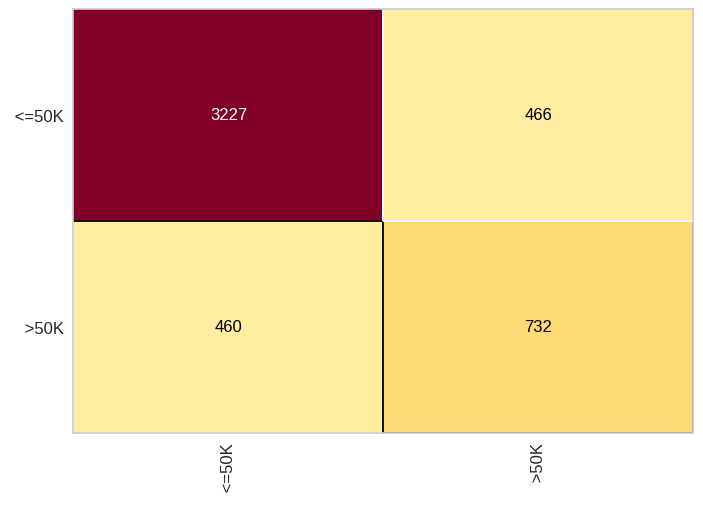

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_census)
cm.fit(X_census_train, y_census_train)
cm.score(X_census_test, y_census_test)

In [ ]:
print(classification_report(y_census_test, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.87      3693
        >50K       0.61      0.61      0.61      1192

    accuracy                           0.81      4885
   macro avg       0.74      0.74      0.74      4885
weighted avg       0.81      0.81      0.81      4885



# Random forest

- basicamente faremos varias arvores e escolheremos o valor da maioria
- cada uma das arvores vai pegar atributos diferentes para comparação das metricas


## Base credit data

In [ ]:
import pickle
with open('/content/drive/MyDrive/Machine Learning e Data Science com Python de A a Z/01. Classificação /credit.pkl', 'rb') as f:
  X_credit_train, X_credit_test, y_credit_train, y_credit_test = pickle.load(f)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_credit = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state=0)
rf_credit.fit(X_credit_train, y_credit_train)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

In [ ]:
previsoes = rf_credit.predict(X_credit_test)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
y_credit_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
accuracy_score(y_credit_test, previsoes) # melhor resultado ate agora

0.984

0.984

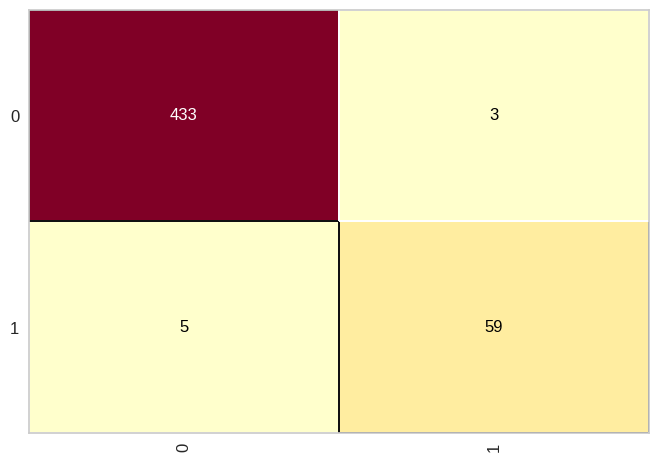

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(rf_credit)
cm.fit(X_credit_train, y_credit_train)
cm.score(X_credit_test, y_credit_test)

In [ ]:
print(classification_report(y_credit_test, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.95      0.92      0.94        64

    accuracy                           0.98       500
   macro avg       0.97      0.96      0.96       500
weighted avg       0.98      0.98      0.98       500



## Base census

In [ ]:
with open('/content/drive/MyDrive/Machine Learning e Data Science com Python de A a Z/01. Classificação /census.pkl', 'rb') as f:
  X_census_train, X_census_test, y_census_train, y_census_test = pickle.load(f)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning e Data Science com Python de A a Z/Bases de dados/census.csv')
df.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
rf_census = RandomForestClassifier(n_estimators = 100, criterion='entropy', random_state=0)
rf_census.fit(X_census_train, y_census_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [ ]:
previsoes = rf_census.predict(X_census_test)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [ ]:
y_census_test

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [ ]:
accuracy_score(y_census_test, previsoes)

0.8507676560900717

0.8507676560900717

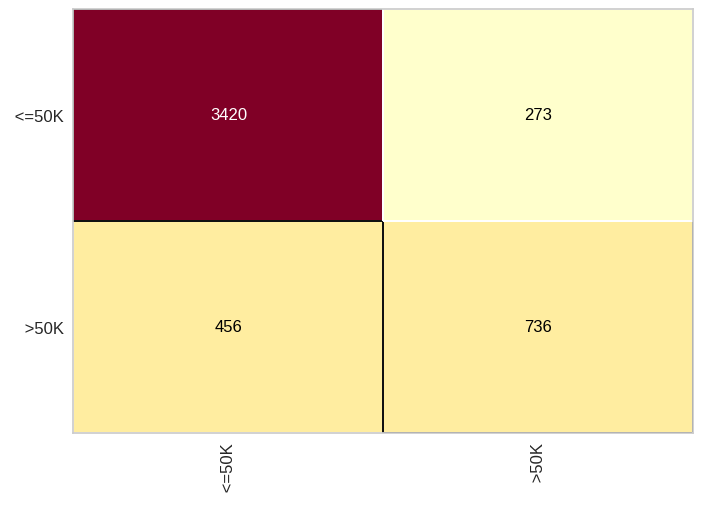

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(rf_census)
cm.fit(X_census_train, y_census_train)
cm.score(X_census_test, y_census_test)

In [ ]:
print(classification_report(y_census_test, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3693
        >50K       0.73      0.62      0.67      1192

    accuracy                           0.85      4885
   macro avg       0.81      0.77      0.79      4885
weighted avg       0.85      0.85      0.85      4885

